# APPLICATION OF FACEBOOK' S P ROPHET ALGORITHM FOR SUCCESSFUL SALES FORECASTING BASED ON REAL - WORLD DATA

## Requirements

In [3]:
#pip install pandas
#pip install fbprophet
#pip install plotly

## Importing required modules

In [2]:
# Import modules
import pandas as pd 
from fbprophet import Prophet 
from fbprophet.plot import add_changepoints_to_plot

## Reading the CSV - Monthly car sales

In [22]:
# Read Data
data = pd.read_csv('data/example_retail_sales.csv') 
data.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


## Creating the dataframe
We convert the data into the convention of ds (date timeseries) and y (output) to be predicted.  
In this case, it is the number of monthly car sales.

In [29]:
df = pd.DataFrame() 
df['ds'] = pd.to_datetime(data['ds']) 
df['y'] = data['y'] 
df.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


## Initialize the model
Here we initialize the model and fit the dataframe to it.

In [24]:
m = Prophet() 
m.fit(df) 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Generate the future dataframe
Here, we create predictions for the next 5 years, and since the frequency is monthly, we need to create 12*5 periods

In [25]:
future = m.make_future_dataframe(periods=12 * 5, freq='M')

## Analyze predictions

### Prophet forecasts

In [26]:
forecast = m.predict(future) 
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
348,2020-12-31,505380.227377,477745.514260,534141.486064,541123.046829,514942.071247,566987.252348
349,2021-01-31,513813.937506,484854.858024,542143.316593,542549.731202,515664.136574,569136.654966
350,2021-02-28,540156.746358,510883.038580,568570.383196,543838.349346,516045.496195,571078.945437
351,2021-03-31,540095.010702,509562.411222,568803.057434,545265.033719,516600.600025,573253.956340
352,2021-04-30,558810.732585,527374.852567,587569.200708,546645.696015,517021.067878,575104.655772


### Plotting the model

The below image shows the basic prediction. The light blue is the uncertainty level(yhat_upper and yhat_lower), the dark blue is the prediction(yhat) and the black dots are the original data. We can see that the predicted data is very close to the actual data. In the last five years, there is no “actual” data, but looking at the performance of our model in years where data is available it is safe to say that the predictions are close to accurate.

/home/tomascosta/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/tomascosta/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/home/tomascosta/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/tomascosta/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (

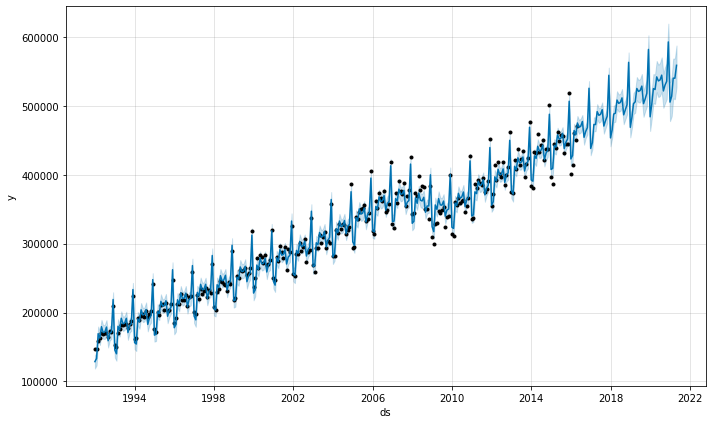

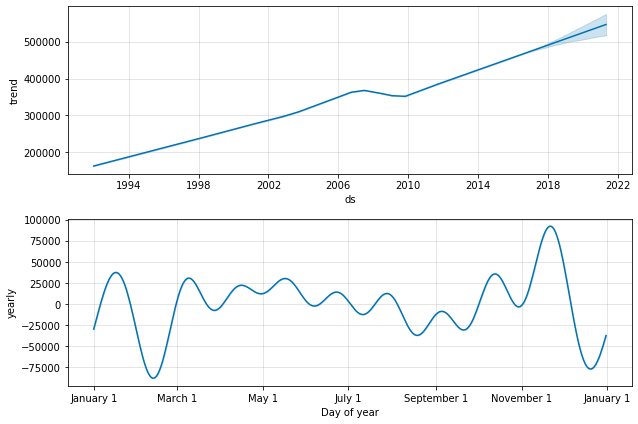

In [27]:
fig = m.plot(forecast) 

fig2 = m.plot_components(forecast) 

/home/tomascosta/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


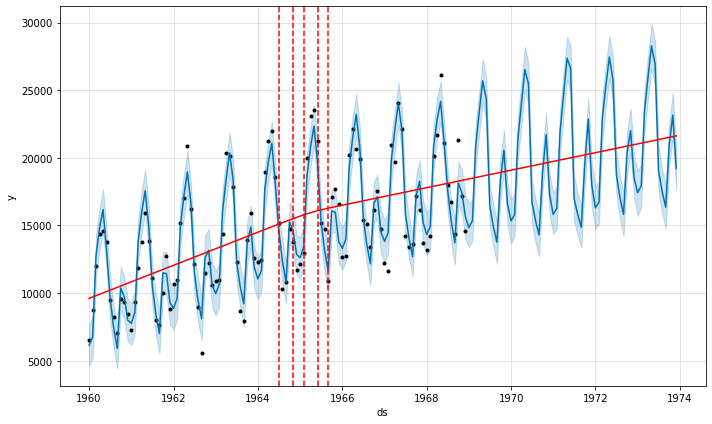

In [21]:
# Adding changepoints

fig = m.plot(forecast) 
a = add_changepoints_to_plot(fig.gca(), m, forecast)